In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
pd.options.mode.chained_assignment = None  # default='warn' #to get rid of warning when adding new column with specific name

# import custom functions
from FRAP_functions import *

#set font, will be changed to Arial upon import into Adobe illustrator
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

# for statistical testing
from scipy import stats
import pylab 

# Specify_colors 
SMC4_color = '#4169E1' #'royalblue'
NCAPH_color = '#1E90FF' # 'dodgerblue'
NCAPH2_color = '#6495ED' # 'cornflowerblue'
CTCF_color = '#FF1493' #'deeppink'
RAD21_color = '#008000' # 'green'
STAG1_color = '#32CD32' # 'limegreen'
STAG2_color = '#228B22' # 'forestgreen'
grey_color = '#808080' # 'grey'

# Data import

In [2]:
#metaphase
metaphase_corr_FALSE = pd.read_csv(r"C:\GIT\MExit_Brunner_2024\Data\05_FRAP\02_processed_FRAP_data\1_metaphase\Metaphase_bg_subtract_FALSE.csv", sep = ",")
metaphase_corr_FALSE['chr_volume_mic3'] = 'nan'
#metaphase unbleached
metaphase_corr_FALSE_unbl = pd.read_csv(r"C:\GIT\MExit_Brunner_2024\Data\05_FRAP\02_processed_FRAP_data\1_metaphase\Metaphase_unbl_bg_subtract_FALSE.csv", sep = ",")
metaphase_corr_FALSE_unbl['chr_volume_mic3'] = 'nan'
#earlyG1
eG1_bl = pd.read_csv(r"C:\GIT\MExit_Brunner_2024\Data\05_FRAP\02_processed_FRAP_data\2_earlyG1\earlyG1.csv", sep = ",")
eG1_unbl = pd.read_csv(r"C:\GIT\MExit_Brunner_2024\Data\05_FRAP\02_processed_FRAP_data\2_earlyG1\earlyG1_unbl.csv", sep = ",")
#G1 (unfiltered)
G1_bl = pd.read_csv(r"C:\GIT\MExit_Brunner_2024\Data\05_FRAP\02_processed_FRAP_data\3_G1\G1.csv", sep = ",")
G1_unbl = pd.read_csv(r"C:\GIT\MExit_Brunner_2024\Data\05_FRAP\02_processed_FRAP_data\3_G1\G1_unbl.csv", sep = ",")
# CTCF RAD21 depletion data
CTCF_delta_RAD21_G1_bl = pd.read_csv(r"C:\GIT\MExit_Brunner_2024\Data\05_FRAP\02_processed_FRAP_data\4_RAD21_depletion_G1\G1.csv", sep = ",")
CTCF_delta_RAD21_G1_unbl = pd.read_csv(r"C:\GIT\MExit_Brunner_2024\Data\05_FRAP\02_processed_FRAP_data\4_RAD21_depletion_G1\G1_unbl.csv", sep = ",")

## Subset dataframes into individual POI dfs

### Metaphase


In [3]:
# subset dfs without background subtraction
SMC4_metaphase = metaphase_corr_FALSE.loc[metaphase_corr_FALSE['POI'] == 'SMC4'].reset_index(drop=True)
NCAPH_metaphase = metaphase_corr_FALSE.loc[metaphase_corr_FALSE['POI'] == 'NCAPH'].reset_index(drop=True)
NCAPH2_metaphase = metaphase_corr_FALSE.loc[metaphase_corr_FALSE['POI'] == 'NCAPH2'].reset_index(drop=True)
CTCF_metaphase = metaphase_corr_FALSE.loc[metaphase_corr_FALSE['POI'] == 'CTCF'].reset_index(drop=True)
RAD21_metaphase = metaphase_corr_FALSE.loc[metaphase_corr_FALSE['POI'] == 'RAD21'].reset_index(drop=True)
STAG1_metaphase = metaphase_corr_FALSE.loc[metaphase_corr_FALSE['POI'] == 'STAG1'].reset_index(drop=True)
STAG2_metaphase = metaphase_corr_FALSE.loc[metaphase_corr_FALSE['POI'] == 'STAG2'].reset_index(drop=True)
#and unbl data to extract bound fraction
SMC4_metaphase_unbl = metaphase_corr_FALSE_unbl.loc[metaphase_corr_FALSE_unbl['POI'] == 'SMC4'].reset_index(drop=True)
NCAPH_metaphase_unbl = metaphase_corr_FALSE_unbl.loc[metaphase_corr_FALSE_unbl['POI'] == 'NCAPH'].reset_index(drop=True)
NCAPH2_metaphase_unbl = metaphase_corr_FALSE_unbl.loc[metaphase_corr_FALSE_unbl['POI'] == 'NCAPH2'].reset_index(drop=True)
CTCF_metaphase_unbl = metaphase_corr_FALSE_unbl.loc[metaphase_corr_FALSE_unbl['POI'] == 'CTCF'].reset_index(drop=True)
RAD21_metaphase_unbl = metaphase_corr_FALSE_unbl.loc[metaphase_corr_FALSE_unbl['POI'] == 'RAD21'].reset_index(drop=True)
STAG1_metaphase_unbl = metaphase_corr_FALSE_unbl.loc[metaphase_corr_FALSE_unbl['POI'] == 'STAG1'].reset_index(drop=True)
STAG2_metaphase_unbl = metaphase_corr_FALSE_unbl.loc[metaphase_corr_FALSE_unbl['POI'] == 'STAG2'].reset_index(drop=True)

### early G1

In [4]:
# bleached dataframe
SMC4_eG1_bl = eG1_bl.loc[eG1_bl['POI'] == 'SMC4'].reset_index(drop=True)
SMC4_eG1_bl['index'] = SMC4_eG1_bl.index
NCAPH_eG1_bl = eG1_bl.loc[eG1_bl['POI'] == 'NCAPH'].reset_index(drop=True)
NCAPH_eG1_bl['index'] = NCAPH_eG1_bl.index
NCAPH2_eG1_bl = eG1_bl.loc[eG1_bl['POI'] == 'NCAPH2'].reset_index(drop=True)
NCAPH2_eG1_bl['index'] = NCAPH2_eG1_bl.index
CTCF_eG1_bl = eG1_bl.loc[eG1_bl['POI'] == 'CTCF'].reset_index(drop=True)
CTCF_eG1_bl['index'] = CTCF_eG1_bl.index
RAD21_eG1_bl = eG1_bl.loc[eG1_bl['POI'] == 'RAD21'].reset_index(drop=True)
RAD21_eG1_bl['index'] = RAD21_eG1_bl.index
STAG1_eG1_bl = eG1_bl.loc[eG1_bl['POI'] == 'STAG1'].reset_index(drop=True)
STAG1_eG1_bl['index'] = STAG1_eG1_bl.index
STAG2_eG1_bl = eG1_bl.loc[eG1_bl['POI'] == 'STAG2'].reset_index(drop=True)
STAG2_eG1_bl['index'] = STAG2_eG1_bl.index

#unbleached dataframe
SMC4_eG1_unbl = eG1_unbl.loc[eG1_unbl['POI'] == 'SMC4'].reset_index(drop=True)
SMC4_eG1_unbl['index'] = SMC4_eG1_unbl.index
NCAPH_eG1_unbl = eG1_unbl.loc[eG1_unbl['POI'] == 'NCAPH'].reset_index(drop=True)
NCAPH_eG1_unbl['index'] = NCAPH_eG1_unbl.index
NCAPH2_eG1_unbl = eG1_unbl.loc[eG1_unbl['POI'] == 'NCAPH2'].reset_index(drop=True)
NCAPH2_eG1_unbl['index'] = NCAPH2_eG1_unbl.index
CTCF_eG1_unbl = eG1_unbl.loc[eG1_unbl['POI'] == 'CTCF'].reset_index(drop=True)
CTCF_eG1_unbl['index'] = CTCF_eG1_unbl.index
RAD21_eG1_unbl = eG1_unbl.loc[eG1_unbl['POI'] == 'RAD21'].reset_index(drop=True)
RAD21_eG1_unbl['index'] = RAD21_eG1_unbl.index
STAG1_eG1_unbl = eG1_unbl.loc[eG1_unbl['POI'] == 'STAG1'].reset_index(drop=True)
STAG1_eG1_unbl['index'] = STAG1_eG1_unbl.index
STAG2_eG1_unbl = eG1_unbl.loc[eG1_unbl['POI'] == 'STAG2'].reset_index(drop=True)
STAG2_eG1_unbl['index'] = STAG2_eG1_unbl.index


### G1 (unfiltered)

In [5]:
# bleached dataframe
CTCF_G1_bl = G1_bl.loc[G1_bl['POI'] == 'CTCF'].reset_index(drop=True)
CTCF_G1_bl['index'] = CTCF_G1_bl.index
RAD21_G1_bl = G1_bl.loc[G1_bl['POI'] == 'RAD21'].reset_index(drop=True)
RAD21_G1_bl['index'] = RAD21_G1_bl.index
STAG1_G1_bl = G1_bl.loc[G1_bl['POI'] == 'STAG1'].reset_index(drop=True)
STAG1_G1_bl['index'] = STAG1_G1_bl.index
STAG2_G1_bl = G1_bl.loc[G1_bl['POI'] == 'STAG2'].reset_index(drop=True)
STAG2_G1_bl['index'] = STAG2_G1_bl.index

#unbleached dataframe
CTCF_G1_unbl = G1_unbl.loc[G1_unbl['POI'] == 'CTCF'].reset_index(drop=True)
CTCF_G1_unbl['index'] = CTCF_G1_unbl.index
RAD21_G1_unbl = G1_unbl.loc[G1_unbl['POI'] == 'RAD21'].reset_index(drop=True)
RAD21_G1_unbl['index'] = RAD21_G1_unbl.index
STAG1_G1_unbl = G1_unbl.loc[G1_unbl['POI'] == 'STAG1'].reset_index(drop=True)
STAG1_G1_unbl['index'] = STAG1_G1_unbl.index
STAG2_G1_unbl = G1_unbl.loc[G1_unbl['POI'] == 'STAG2'].reset_index(drop=True)
STAG2_G1_unbl['index'] = STAG2_G1_unbl.index

### filter G1 by nuclear volume cutoff

In [6]:
# CTCF data does not require filtering (no correlation of volume and residence time)
RAD21_G1_bl_filtered = RAD21_G1_bl.loc[(RAD21_G1_bl['chr_volume_mic3'] <= 1050)].reset_index(drop=True)
RAD21_G1_bl_filtered['index'] = RAD21_G1_bl_filtered.index
STAG1_G1_bl_filtered = STAG1_G1_bl.loc[(STAG1_G1_bl['chr_volume_mic3'] <= 1050)].reset_index(drop=True)
STAG1_G1_bl_filtered['index'] = STAG1_G1_bl_filtered.index
STAG2_G1_bl_filtered = STAG2_G1_bl.loc[(STAG2_G1_bl['chr_volume_mic3'] <= 1050)].reset_index(drop=True)
STAG2_G1_bl_filtered['index'] = STAG2_G1_bl_filtered.index

# unbleached data
RAD21_G1_unbl_filtered = RAD21_G1_unbl.loc[(RAD21_G1_unbl['chr_volume_mic3'] <= 1050)].reset_index(drop=True)
RAD21_G1_unbl_filtered['index'] = RAD21_G1_unbl_filtered.index
STAG1_G1_unbl_filtered = STAG1_G1_unbl.loc[(STAG1_G1_unbl['chr_volume_mic3'] <= 1050)].reset_index(drop=True)
STAG1_G1_unbl_filtered['index'] = STAG1_G1_unbl_filtered.index
STAG2_G1_unbl_filtered = STAG2_G1_unbl.loc[(STAG2_G1_unbl['chr_volume_mic3'] <= 1050)].reset_index(drop=True)
STAG2_G1_unbl_filtered['index'] = STAG2_G1_unbl_filtered.index


### concatenate earlyG1 and G1 time-series for comparison

In [7]:
CTCF = pd.concat([CTCF_eG1_bl, CTCF_G1_bl])
RAD21 = pd.concat([RAD21_eG1_bl, RAD21_G1_bl_filtered])
STAG1 = pd.concat([STAG1_eG1_bl, STAG1_G1_bl_filtered])
STAG2 = pd.concat([STAG2_eG1_bl, STAG2_G1_bl_filtered])

## Subset CTCF delta RAD21 data sbased on condition (WT, dRAD21, overexpression)

In [8]:
# bleached dataframe
CTCF_RAD21_bl = CTCF_delta_RAD21_G1_bl.loc[CTCF_delta_RAD21_G1_bl['POI'] == 'CTCF_WT'].reset_index(drop=True)
CTCF_RAD21_bl['index'] = CTCF_RAD21_bl.index
CTCF_dRAD21_bl = CTCF_delta_RAD21_G1_bl.loc[CTCF_delta_RAD21_G1_bl['POI'] == 'CTCF_deltaRAD21'].reset_index(drop=True)
CTCF_dRAD21_bl['index'] = CTCF_dRAD21_bl.index
CTCF_RAD21_OE_bl = CTCF_delta_RAD21_G1_bl.loc[CTCF_delta_RAD21_G1_bl['POI'] == 'CTCF_RAD21_OE'].reset_index(drop=True)
CTCF_RAD21_OE_bl['index'] = CTCF_RAD21_OE_bl.index
CTCF_dRAD21_rescue_24h_bl = CTCF_delta_RAD21_G1_bl.loc[CTCF_delta_RAD21_G1_bl['POI'] == 'CTCF_deltaRAD21_rescue_24h'].reset_index(drop=True)
CTCF_dRAD21_rescue_24h_bl['index'] = CTCF_dRAD21_rescue_24h_bl.index
#24h rescue cell04 is messy and has to be dropped:
CTCF_dRAD21_rescue_24h_bl = CTCF_dRAD21_rescue_24h_bl[CTCF_dRAD21_rescue_24h_bl.cellID != '220906_CTCF_+IAA_24hOE_concatenated_r2cell04']
CTCF_dRAD21_rescue_48h_bl = CTCF_delta_RAD21_G1_bl.loc[CTCF_delta_RAD21_G1_bl['POI'] == 'CTCF_deltaRAD21_rescue_48h'].reset_index(drop=True)
CTCF_dRAD21_rescue_48h_bl['index'] = CTCF_dRAD21_rescue_48h_bl.index

CTCF_dRAD21_rescue = pd.concat([CTCF_dRAD21_rescue_24h_bl, CTCF_dRAD21_rescue_48h_bl])

# unbleached dataframe
CTCF_RAD21_unbl = CTCF_delta_RAD21_G1_unbl.loc[CTCF_delta_RAD21_G1_unbl['POI'] == 'CTCF_WT'].reset_index(drop=True)
CTCF_RAD21_unbl['index'] = CTCF_RAD21_unbl.index
CTCF_dRAD21_unbl = CTCF_delta_RAD21_G1_unbl.loc[CTCF_delta_RAD21_G1_unbl['POI'] == 'CTCF_deltaRAD21'].reset_index(drop=True)
CTCF_dRAD21_unbl['index'] = CTCF_dRAD21_unbl.index
CTCF_RAD21_OE_unbl = CTCF_delta_RAD21_G1_unbl.loc[CTCF_delta_RAD21_G1_unbl['POI'] == 'CTCF_RAD21_OE'].reset_index(drop=True)
CTCF_RAD21_OE_unbl['index'] = CTCF_RAD21_OE_unbl.index
CTCF_dRAD21_rescue_24h_unbl = CTCF_delta_RAD21_G1_unbl.loc[CTCF_delta_RAD21_G1_unbl['POI'] == 'CTCF_deltaRAD21_rescue_24h'].reset_index(drop=True)
CTCF_dRAD21_rescue_24h_unbl['index'] = CTCF_dRAD21_rescue_24h_unbl.index
#24h rescue cell04 is messy and has to be dropped:
CTCF_dRAD21_rescue_24h_unbl = CTCF_dRAD21_rescue_24h_unbl[CTCF_dRAD21_rescue_24h_unbl.cellID != '220906_CTCF_+IAA_24hOE_concatenated_r2cell04']
CTCF_dRAD21_rescue_48h_unbl = CTCF_delta_RAD21_G1_unbl.loc[CTCF_delta_RAD21_G1_unbl['POI'] == 'CTCF_deltaRAD21_rescue_48h'].reset_index(drop=True)
CTCF_dRAD21_rescue_48h_unbl['index'] = CTCF_dRAD21_rescue_48h_unbl.index


# FRAP recovery plots

## Suppl. Fig. 3

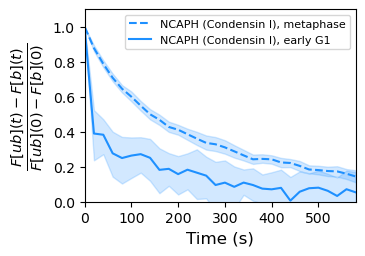

In [9]:
def plot_compare(data1, data2, plot = 'diff_norm', color = 'grey', crop = False):
    if crop == True:
        data1 = data1.loc[data1['time'] >=0]
        data2 = data2.loc[data2['time'] >=0]

    fig, ax = plt.subplots()
    fig.set_figheight(2.5)
    fig.set_figwidth(3.5)
    sns.lineplot(x = "time", y= str(plot), data = data1, ax=ax, color = color, label = 'NCAPH (Condensin I), metaphase', linestyle = "dashed")
    sns.lineplot(x = "time", y= str(plot), data = data2, ax=ax, color = color, label = 'NCAPH (Condensin I), early G1')
    plt.xlim(0,580)
    plt.ylim(0,1.1)
    plt.ylabel(r'$\frac{F[ub](t)-F[b](t)}{F[ub](0)-F[b](0)}$', fontsize = 15)
    plt.xlabel('Time (s)', fontsize = 12)
    plt.legend(fontsize = 8)
    plt.xticks(fontsize = 10)
    plt.yticks(fontsize = 10)
    
plot_compare(NCAPH_metaphase, NCAPH_eG1_bl, color = NCAPH_color)

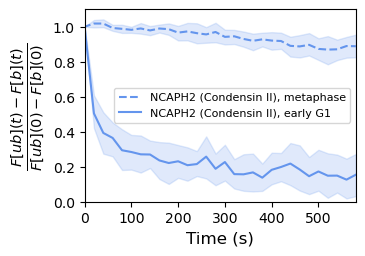

In [80]:
def plot_compare(data1, data2, plot = 'diff_norm', color = 'grey', crop = False):
    if crop == True:
        data1 = data1.loc[data1['time'] >=0]
        data2 = data2.loc[data2['time'] >=0]

    fig, ax = plt.subplots()
    fig.set_figheight(2.5)
    fig.set_figwidth(3.5)
    sns.lineplot(x = "time", y= str(plot), data = data1, ax=ax, color = color, label = 'NCAPH2 (Condensin II), metaphase', linestyle = "dashed")
    sns.lineplot(x = "time", y= str(plot), data = data2, ax=ax, color = color, label = 'NCAPH2 (Condensin II), early G1')
    plt.xlim(0,580)
    plt.ylim(0,1.1)
    plt.ylabel(r'$\frac{F[ub](t)-F[b](t)}{F[ub](0)-F[b](0)}$', fontsize = 15)
    plt.xlabel('Time (s)', fontsize = 12)
    plt.legend(fontsize = 8)
    plt.xticks(fontsize = 10)
    plt.yticks(fontsize = 10)
    
plot_compare(NCAPH2_metaphase, NCAPH2_eG1_bl, color = NCAPH2_color)

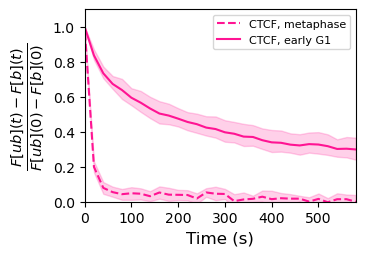

In [21]:
def plot_compare(data1, data2, plot = 'diff_norm', color = 'grey', crop = False):
    if crop == True:
        data1 = data1.loc[data1['time'] >=0]
        data2 = data2.loc[data2['time'] >=0]

    fig, ax = plt.subplots()
    fig.set_figheight(2.5)
    fig.set_figwidth(3.5)
    sns.lineplot(x = "time", y= str(plot), data = data1, ax=ax, color = color, label = 'CTCF, metaphase', linestyle = "dashed")
    sns.lineplot(x = "time", y= str(plot), data = data2, ax=ax, color = color, label = 'CTCF, early G1')
    plt.xlim(0,580)
    plt.ylim(0,1.1)
    plt.ylabel(r'$\frac{F[ub](t)-F[b](t)}{F[ub](0)-F[b](0)}$', fontsize = 15)
    plt.xlabel('Time (s)', fontsize = 12)
    plt.legend(fontsize = 8)
    plt.xticks(fontsize = 10)
    plt.yticks(fontsize = 10)
    
plot_compare(CTCF_metaphase, CTCF_eG1_bl, color = CTCF_color)

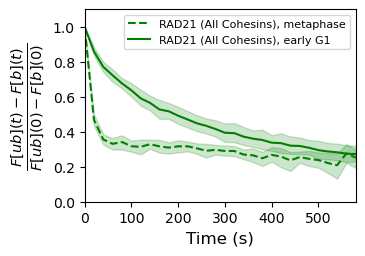

In [23]:
def plot_compare(data1, data2, plot = 'diff_norm', color = 'grey', crop = False):
    if crop == True:
        data1 = data1.loc[data1['time'] >=0]
        data2 = data2.loc[data2['time'] >=0]

    fig, ax = plt.subplots()
    fig.set_figheight(2.5)
    fig.set_figwidth(3.5)
    sns.lineplot(x = "time", y= str(plot), data = data1, ax=ax, color = color, label = 'RAD21 (All Cohesins), metaphase', linestyle = "dashed")
    sns.lineplot(x = "time", y= str(plot), data = data2, ax=ax, color = color, label = 'RAD21 (All Cohesins), early G1')
    plt.xlim(0,580)
    plt.ylim(0,1.1)
    plt.ylabel(r'$\frac{F[ub](t)-F[b](t)}{F[ub](0)-F[b](0)}$', fontsize = 15)
    plt.xlabel('Time (s)', fontsize = 12)
    plt.legend(fontsize = 8)
    plt.xticks(fontsize = 10)
    plt.yticks(fontsize = 10)
    
plot_compare(RAD21_metaphase, RAD21_eG1_bl, color = RAD21_color)

## Figure 4 - FRAP recovery plots

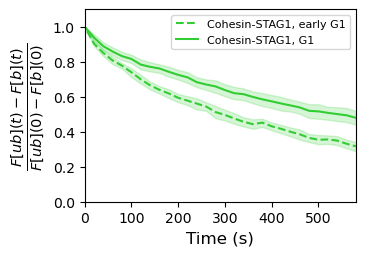

In [28]:
def plot_compare(data1, data2, plot = 'diff_norm', color = 'grey', crop = False):
    if crop == True:
        data1 = data1.loc[data1['time'] >=0]
        data2 = data2.loc[data2['time'] >=0]

    fig, ax = plt.subplots()
    fig.set_figheight(2.5)
    fig.set_figwidth(3.5)
    sns.lineplot(x = "time", y= str(plot), data = data1, ax=ax, color = color, label = 'Cohesin-STAG1, early G1', linestyle = "dashed")
    sns.lineplot(x = "time", y= str(plot), data = data2, ax=ax, color = color, label = 'Cohesin-STAG1, G1')
    plt.xlim(0,580)
    plt.ylim(0,1.1)
    plt.ylabel(r'$\frac{F[ub](t)-F[b](t)}{F[ub](0)-F[b](0)}$', fontsize = 15)
    plt.xlabel('Time (s)', fontsize = 12)
    plt.legend(fontsize = 8)
    plt.xticks(fontsize = 10)
    plt.yticks(fontsize = 10)
    
plot_compare(STAG1_eG1_bl, STAG1_G1_bl, color = STAG1_color)

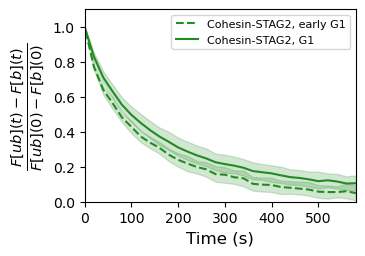

In [29]:
def plot_compare(data1, data2, plot = 'diff_norm', color = 'grey', crop = False):
    if crop == True:
        data1 = data1.loc[data1['time'] >=0]
        data2 = data2.loc[data2['time'] >=0]

    fig, ax = plt.subplots()
    fig.set_figheight(2.5)
    fig.set_figwidth(3.5)
    sns.lineplot(x = "time", y= str(plot), data = data1, ax=ax, color = color, label = 'Cohesin-STAG2, early G1', linestyle = "dashed")
    sns.lineplot(x = "time", y= str(plot), data = data2, ax=ax, color = color, label = 'Cohesin-STAG2, G1')
    plt.xlim(0,580)
    plt.ylim(0,1.1)
    plt.ylabel(r'$\frac{F[ub](t)-F[b](t)}{F[ub](0)-F[b](0)}$', fontsize = 15)
    plt.xlabel('Time (s)', fontsize = 12)
    plt.legend(fontsize = 8)
    plt.xticks(fontsize = 10)
    plt.yticks(fontsize = 10)
    
plot_compare(STAG2_eG1_bl, STAG2_G1_bl, color = STAG2_color)

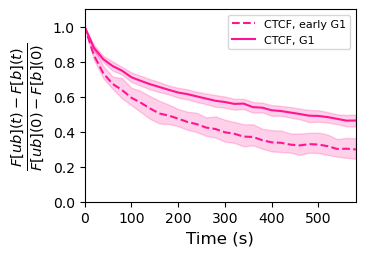

In [30]:
def plot_compare(data1, data2, plot = 'diff_norm', color = 'grey', crop = False):
    if crop == True:
        data1 = data1.loc[data1['time'] >=0]
        data2 = data2.loc[data2['time'] >=0]

    fig, ax = plt.subplots()
    fig.set_figheight(2.5)
    fig.set_figwidth(3.5)
    sns.lineplot(x = "time", y= str(plot), data = data1, ax=ax, color = color, label = 'CTCF, early G1', linestyle = "dashed")
    sns.lineplot(x = "time", y= str(plot), data = data2, ax=ax, color = color, label = 'CTCF, G1')
    plt.xlim(0,580)
    plt.ylim(0,1.1)
    plt.ylabel(r'$\frac{F[ub](t)-F[b](t)}{F[ub](0)-F[b](0)}$', fontsize = 15)
    plt.xlabel('Time (s)', fontsize = 12)
    plt.legend(fontsize = 8)
    plt.xticks(fontsize = 10)
    plt.yticks(fontsize = 10)
    
plot_compare(CTCF_eG1_bl, CTCF_G1_bl, color = CTCF_color)

# Figure 4 - CTCF dRAD21 plot

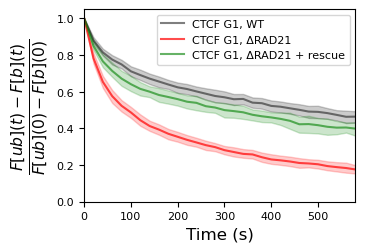

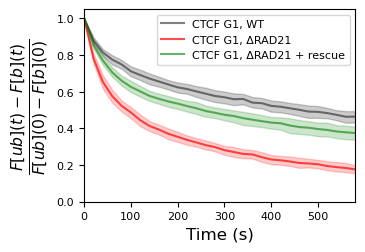

In [10]:
def plot_compare_avg_3(data1, data2, data3, plot = 'diff_norm', color1 = 'grey', color2 = 'blue', color3 = 'red', crop = False):
    if crop == True:
        data1 = data1.loc[data1['time'] >=0]
        data2 = data2.loc[data2['time'] >=0]
        data3 = data3.loc[data3['time'] >=0]

    fig, ax = plt.subplots()
    fig.set_figheight(2.5)
    fig.set_figwidth(3.5)

    sns.lineplot(x = "time", y= str(plot), data = data1, ax=ax, color = color1, alpha = 0.5, label = 'CTCF G1, WT')
    sns.lineplot(x = "time", y= str(plot), data = data2, ax=ax, color = color2, alpha = 0.7, label = 'CTCF G1, ΔRAD21')
    sns.lineplot(x = "time", y= str(plot), data = data3, ax=ax, color = color3, alpha = 0.6, label = 'CTCF G1, ΔRAD21 + rescue')
    plt.ylim(0,1.05)
    plt.xlabel("Time (s)", fontsize = 12)

    if plot == 'diff_norm':
        plt.ylabel(r'$\frac{F[ub](t)-F[b](t)}{F[ub](0)-F[b](0)}$', fontsize = 16)
    else:
        plt.ylabel(str(plot), fontsize = 12)
    plt.xlim(0,580)
    plt.legend(fontsize = 8)
    plt.xticks(fontsize = 8)
    plt.yticks(fontsize = 8)
    
plot_compare_avg_3(CTCF_G1_bl, CTCF_dRAD21_bl, CTCF_dRAD21_rescue_24h_bl, plot = 'diff_norm', color1 = 'black', color2 = 'red', color3 = 'g', crop = True)
plot_compare_avg_3(CTCF_G1_bl, CTCF_dRAD21_bl, CTCF_dRAD21_rescue, plot = 'diff_norm', color1 = 'black', color2 = 'red', color3 = 'g', crop = True)

# Fitting data

This function calculates bound fractions from FRAP recovery curves (pre_bleach - post_bleach / prebleach) and fits 4 different exponential models to the data (single component without/with immobile fraction (IF), two-component without/with IF)

In [33]:
# test_model_fits(CTCF_eG1_bl, CTCF_eG1_unbl, r'P:\Andi\FRAP\220906_FRAP_analysis\04_fitting_results\CTCF_results\eG1\single_fits', save = False, plotting = True)

# Plot fit results

### For that, the results from the data fitting have to be imported first

## Making ratio plots of eG1 vs G1

In [88]:
### load the data

def import_subset_data(path, model, POI_name, cell_cycle_stage):
    '''
    Function to load dataset and subset by model
    '''
    df = pd.read_csv(path, sep = ",")
    df_model = df.loc[df['model']== model]
    df_model['POI'] = POI_name
    df_model['cell_cycle_stage']= cell_cycle_stage
    return df_model

# eG1 data
CTCF_mod_IF_eG1 = import_subset_data(r"C:\GIT\MExit_Brunner_2024\Data\05_FRAP\03_fitting_results\CTCF_eG1.csv", 
                                 "mod_IF", "CTCF", 'eG1')
RAD21_mod_IF_eG1 = import_subset_data(r"C:\GIT\MExit_Brunner_2024\Data\05_FRAP\03_fitting_results\RAD21_eG1.csv", 
                                 "mod_IF", "RAD21", 'eG1')
STAG1_mod_IF_eG1 = import_subset_data(r"C:\GIT\MExit_Brunner_2024\Data\05_FRAP\03_fitting_results\STAG1_eG1.csv", 
                                 "mod_IF", "STAG1", 'eG1')
STAG2_mod_IF_eG1 = import_subset_data(r"C:\GIT\MExit_Brunner_2024\Data\05_FRAP\03_fitting_results\STAG2_eG1.csv", 
                                 "mod_IF", "STAG2", 'eG1')
concat_data_eG1 =  pd.concat([CTCF_mod_IF_eG1, RAD21_mod_IF_eG1, STAG1_mod_IF_eG1, STAG2_mod_IF_eG1])
concat_data_eG1_no_RAD21 =  pd.concat([CTCF_mod_IF_eG1, STAG1_mod_IF_eG1, STAG2_mod_IF_eG1])

# concat_data_eG1

# G1 data
CTCF_mod_IF_G1 = import_subset_data(r"C:\GIT\MExit_Brunner_2024\Data\05_FRAP\03_fitting_results\CTCF_G1.csv", 
                                 "mod_IF", "CTCF", 'G1')
RAD21_mod_IF_G1 = import_subset_data(r"C:\GIT\MExit_Brunner_2024\Data\05_FRAP\03_fitting_results\RAD21_G1.csv", 
                                 "mod_IF", "RAD21", 'G1')
STAG1_mod_IF_G1 = import_subset_data(r"C:\GIT\MExit_Brunner_2024\Data\05_FRAP\03_fitting_results\STAG1_G1.csv", 
                                 "mod_IF", "STAG1", 'G1')
STAG1_mod_IF_G1 = STAG1_mod_IF_G1[(STAG1_mod_IF_G1['IF'] >0) & (STAG1_mod_IF_G1['IF'] <1)] # to get rid of one measurement where IF is -20 (cannot be)
STAG2_mod_IF_G1 = import_subset_data(r"C:\GIT\MExit_Brunner_2024\Data\05_FRAP\03_fitting_results\STAG2_G1.csv", 
                                 "mod_IF", "STAG2", 'G1')
STAG2_mod_IF_G1 = STAG2_mod_IF_G1[(STAG2_mod_IF_G1['IF'] >0) & (STAG2_mod_IF_G1['IF'] <1)]
concat_data_G1 =  pd.concat([CTCF_mod_IF_G1, RAD21_mod_IF_G1, STAG1_mod_IF_G1, STAG2_mod_IF_G1])
concat_data_G1_no_RAD21 =  pd.concat([CTCF_mod_IF_G1, STAG1_mod_IF_G1, STAG2_mod_IF_G1])
concat_data_G1 = concat_data_G1.loc[concat_data_G1['tau'] < 1000] # to filter out outliers with poor fit
# concat_data_G1

# RAD21-EGFP-AID CTCF-Halo WT
CTCF_Halo_mod_IF_G1 = import_subset_data(r"C:\GIT\MExit_Brunner_2024\Data\05_FRAP\03_fitting_results\CTCF-Halo_-IAA.csv", 
                                 "mod_IF", "CTCF -IAA", 'G1')

# RAD21-EGFP-AID CTCF-Halo +IAA
CTCF_mod_IF_G1_deltaRAD21 = import_subset_data(r"C:\GIT\MExit_Brunner_2024\Data\05_FRAP\03_fitting_results\CTCF-Halo_+IAA.csv", 
                                 "mod_IF", "CTCF_deltaRAD21", 'G1')

CTCF_mod_IF_G1_deltaRAD21_rescue = import_subset_data(r"C:\GIT\MExit_Brunner_2024\Data\05_FRAP\03_fitting_results\CTCF-Halo_RAD21_OE_24h.csv", 
                                 "mod_IF", "CTCF_deltaRAD21_rescue", 'G1')

CTCF_mod_IF_G1_deltaRAD21_rescue_48h = import_subset_data(r"C:\GIT\MExit_Brunner_2024\Data\05_FRAP\03_fitting_results\CTCF-Halo_RAD21_OE_48h.csv", 
                                 "mod_IF", "CTCF_deltaRAD21_rescue", 'G1')

concat_mod_IF_rescue = pd.concat([CTCF_mod_IF_G1_deltaRAD21_rescue, CTCF_mod_IF_G1_deltaRAD21_rescue_48h])

C:\Users\abrunner.EMBL\AppData\Local\Temp\ipykernel_20572\1079817807.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(["CTCF", "RAD21", "STAG1", "STAG2"], rotation=60, ha='right', fontsize = 12)
C:\Users\abrunner.EMBL\AppData\Local\Temp\ipykernel_20572\1079817807.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(["CTCF", "RAD21", "STAG1", "STAG2"], rotation=60, ha='right', fontsize = 12)
C:\Users\abrunner.EMBL\AppData\Local\Temp\ipykernel_20572\1079817807.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(["CTCF", "RAD21", "STAG1", "STAG2"], rotation=60, ha='right', fontsize = 12)


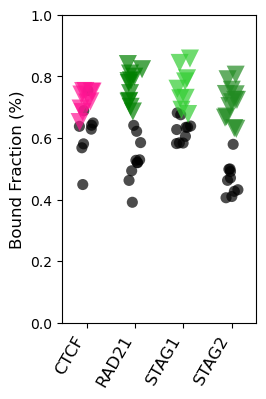

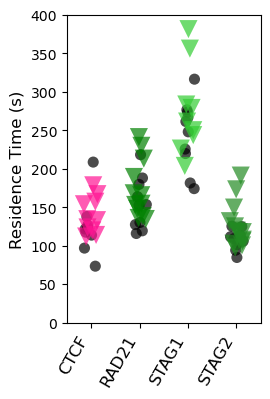

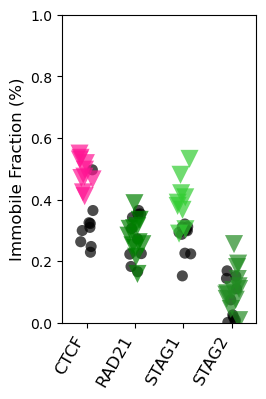

In [89]:
my_pal = {"RAD21": RAD21_color, "STAG1": STAG1_color, "STAG2": STAG2_color, "CTCF": CTCF_color}
my_pal2 = {"RAD21": '#000000', "STAG1": '#000000', "STAG2": '#000000', "CTCF": '#000000'}

def ratio_plot_eG1_G1(df_eG1, df_G1, what_to_plot, palette, palette2):
    fig, ax = plt.subplots()
    fig.set_figheight(4)
    fig.set_figwidth(2.5)
    sns.stripplot(data=df_eG1, x='POI', y=str(what_to_plot), hue = 'POI', palette = palette2, size = 8, alpha = 0.7, jitter = 0.15)
    sns.stripplot(data=df_G1, x='POI', y=str(what_to_plot), hue = 'POI', palette = palette, marker = 'v', size = 13, alpha = 0.7, jitter = 0.15)
    plt.xlabel("")
    ax.get_legend().remove()
    ax.set_xticklabels(["CTCF", "RAD21", "STAG1", "STAG2"], rotation=60, ha='right', fontsize = 12)
    if what_to_plot == 'tau':
        ax.set_ylim(0,400)
        plt.ylabel('Residence Time (s)', fontsize = 12)
        plt.yticks(fontsize = 10)
    if what_to_plot == 'IF':
        ax.set_ylim(0,1)
        plt.ylabel('Immobile Fraction (%)', fontsize = 12)
        plt.yticks(fontsize = 10)
    if what_to_plot == 'bound_fract':
        ax.set_ylim(0,1)
        plt.ylabel('Bound Fraction (%)', fontsize = 12)
        plt.yticks(fontsize = 10)
   
ratio_plot_eG1_G1(concat_data_eG1, concat_data_G1, "bound_fract", my_pal, my_pal2)
ratio_plot_eG1_G1(concat_data_eG1, concat_data_G1, "tau", my_pal, my_pal2)
ratio_plot_eG1_G1(concat_data_eG1, concat_data_G1, "IF", my_pal, my_pal2)

# Making stacked bar plots

In [90]:
# concat eG1 and G1 data for barplots
CTCF = pd.concat([CTCF_mod_IF_eG1, CTCF_mod_IF_G1])
STAG1 = pd.concat([STAG1_mod_IF_eG1, STAG1_mod_IF_G1])
STAG2 = pd.concat([STAG2_mod_IF_eG1, STAG2_mod_IF_G1])

In [91]:
def calc_stable_dynamic_soluble_pool(df):
    df['stable_pool'] = df['bound_fract'] * df['IF']
    df['dynamic_pool'] = df['bound_fract'] - df['stable_pool']
    df['soluble_pool'] = 1 - df['bound_fract']
    return df

calc_stable_dynamic_soluble_pool(concat_data_eG1) # the within contained dataframes for CTCF and STAG1 etc will be updated too

calc_stable_dynamic_soluble_pool(concat_data_G1)
calc_stable_dynamic_soluble_pool(CTCF_mod_IF_G1)
calc_stable_dynamic_soluble_pool(CTCF_mod_IF_G1_deltaRAD21)
calc_stable_dynamic_soluble_pool(CTCF_mod_IF_G1_deltaRAD21_rescue)
calc_stable_dynamic_soluble_pool(concat_mod_IF_rescue)
# calc_stable_dynamic_soluble_pool(CTCF_Halo_mod_IF_G1)
# concat_data_G1
calc_stable_dynamic_soluble_pool(CTCF_mod_IF_eG1)
calc_stable_dynamic_soluble_pool(CTCF_mod_IF_G1)
calc_stable_dynamic_soluble_pool(STAG1_mod_IF_eG1)
calc_stable_dynamic_soluble_pool(STAG1_mod_IF_G1)
calc_stable_dynamic_soluble_pool(STAG2_mod_IF_eG1)
calc_stable_dynamic_soluble_pool(STAG2_mod_IF_G1)

calc_stable_dynamic_soluble_pool(CTCF)
calc_stable_dynamic_soluble_pool(STAG1)
calc_stable_dynamic_soluble_pool(STAG2)
np.mean(CTCF_mod_IF_G1["stable_pool"])

0.3521232048750807

In [92]:
def bound_fract_summary(df):
    name_list = list()
    phase_list = list()
    bound_fract_mean_list = list()
    bound_fract_sd_list = list()
    tau_list = list()
    tau_sd_list = list()
    stable_bound_list = list()
    stable_bound_sd_list = list()
    for name, values in df.groupby("POI"):
        name_list.append(name)
        phase_list.append(values["cell_cycle_stage"].unique()[0])
        bound_fract_mean_list.append(round(np.mean(values["bound_fract"]),2))
        bound_fract_sd_list.append(round(np.std(values["bound_fract"]),3))
        tau_list.append(round(np.mean(values["tau"]),2))
        tau_sd_list.append(round(np.std(values["tau"]),3))
        stable_bound_list.append(round(np.mean(values["stable_pool"]),2))
        stable_bound_sd_list.append(round(np.std(values["stable_pool"]),3))

    df = pd.DataFrame(
    {'POI_name': name_list,
     'phase': phase_list,
     'bound_fract_mean': bound_fract_mean_list,
     'bound_fract_sd': bound_fract_sd_list,
     'tau': tau_list,
     'tau_sd': tau_sd_list,
     'stably_bound_mean': stable_bound_list,
     'stably_bound_sd': stable_bound_sd_list
    })
        
    return df
        
eG1_summary = bound_fract_summary(concat_data_eG1)
G1_summary = bound_fract_summary(concat_data_G1)


# Bar plots of Immobile pool only

(0.0, 0.47)

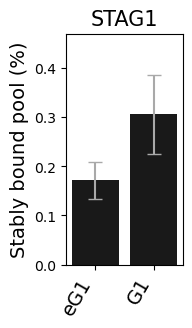

In [93]:
POI = STAG1
POI_string = 'STAG1'

N = 2
ind = np.arange(N)    # the x locations for the groups
width = 0.8    # the width of the bars: can also be len(x) sequence
fig, ax = plt.subplots(1,1, figsize = (1.5,3))
p1 = plt.bar(x = ind, height = POI.groupby('cell_cycle_stage', sort=False)['stable_pool'].mean(), width = width, color = 'black', alpha = 0.9)
plt.errorbar(ind, y = POI.groupby('cell_cycle_stage', sort=False)['stable_pool'].mean(), yerr=POI.groupby('cell_cycle_stage', sort=False)['stable_pool'].std(), fmt="none", color="darkgrey", capsize = 5)
plt.title(POI_string, fontsize = 15)

plt.ylabel('Stably bound pool (%)', fontsize = 14)
plt.xticks(ind, ('eG1', 'G1'),  rotation=60, ha='right', fontsize = 14)
plt.yticks((0.00, 0.10, 0.20, 0.30, 0.4),  fontsize = 10)
plt.ylim(0,0.47)


(0.0, 0.47)

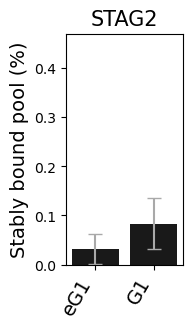

In [94]:
POI = STAG2
POI_string = 'STAG2'

N = 2
ind = np.arange(N)    # the x locations for the groups
width = 0.8    # the width of the bars: can also be len(x) sequence
fig, ax = plt.subplots(1,1, figsize = (1.5,3))
p1 = plt.bar(x = ind, height = POI.groupby('cell_cycle_stage', sort=False)['stable_pool'].mean(), width = width, color = 'black', alpha = 0.9)
plt.errorbar(ind, y = POI.groupby('cell_cycle_stage', sort=False)['stable_pool'].mean(), yerr=POI.groupby('cell_cycle_stage', sort=False)['stable_pool'].std(), fmt="none", color="darkgrey", capsize = 5)
plt.title(POI_string, fontsize = 15)

plt.ylabel('Stably bound pool (%)', fontsize = 14)
plt.xticks(ind, ('eG1', 'G1'),  rotation=60, ha='right', fontsize = 14)
plt.yticks((0.00, 0.10, 0.20, 0.30, 0.4),  fontsize = 10)
plt.ylim(0,0.47)


(0.0, 0.47)

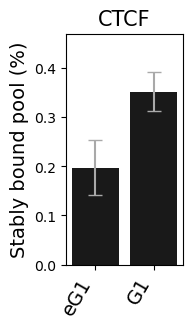

In [95]:
POI = CTCF
POI_string = 'CTCF'

N = 2
ind = np.arange(N)    # the x locations for the groups
width = 0.8    # the width of the bars: can also be len(x) sequence
fig, ax = plt.subplots(1,1, figsize = (1.5,3))
p1 = plt.bar(x = ind, height = POI.groupby('cell_cycle_stage', sort=False)['stable_pool'].mean(), width = width, color = 'black', alpha = 0.9)
plt.errorbar(ind, y = POI.groupby('cell_cycle_stage', sort=False)['stable_pool'].mean(), yerr=POI.groupby('cell_cycle_stage', sort=False)['stable_pool'].std(), fmt="none", color="darkgrey", capsize = 5)
plt.title(POI_string, fontsize = 15)

plt.ylabel('Stably bound pool (%)', fontsize = 14)
plt.xticks(ind, ('eG1', 'G1'),  rotation=60, ha='right', fontsize = 14)
plt.yticks((0.00, 0.10, 0.20, 0.30, 0.4),  fontsize = 10)
plt.ylim(0,0.47)


(0.0, 0.47)

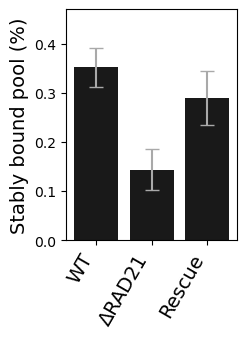

In [96]:
concat_delta_RAD21 = pd.concat([CTCF_mod_IF_G1, CTCF_mod_IF_G1_deltaRAD21, concat_mod_IF_rescue])
data = concat_delta_RAD21

N = 3
ind = np.arange(N)    # the x locations for the groups
width = 0.8    # the width of the bars: can also be len(x) sequence
fig, ax = plt.subplots(1,1, figsize = (2.2,3))
p1 = plt.bar(x = ind, height = data.groupby('POI', sort=False)['stable_pool'].mean(), width = width, color = 'black', alpha = 0.9)
plt.errorbar(ind, y = data.groupby('POI', sort=False)['stable_pool'].mean(), yerr=data.groupby('POI', sort=False)['stable_pool'].std(), fmt="none", color="darkgrey", capsize = 5)

plt.ylabel('Stably bound pool (%)', fontsize = 14)
plt.xticks(ind, ('WT', 'ΔRAD21', 'Rescue'),  rotation=60, ha='right', fontsize = 14)
plt.yticks((0.00, 0.10, 0.20, 0.30, 0.4),  fontsize = 10)
plt.ylim(0,0.47)